In [13]:
import os
import pandas as pd
import string
from razdel import tokenize
import re
import numpy as np
import nltk
from tqdm.auto import tqdm
from collections import Counter
from pymorphy2 import MorphAnalyzer
import math
import matplotlib.pyplot as plt

nltk.download('stopwords')
morph = MorphAnalyzer()

In [ ]:
fin_df = pd.read_csv('/content/groups_and_slurs.csv')

In [ ]:
fin_df

,Реплика 1 toxicity,Реплика 2 toxicity,Результат 1,Результат 2,Значение 1,Значение 2,Реплика 1 original,Реплика 2 original,Реплика 2 lemma,Выделенные слова,target_group
0,нахуя свинозагонные русофильские пидорюндели ...,да этот загон ебаный надо удалять уже почему ...,True,True,0.994447,0.997482,Нахуя свинозагонные русофильские пидорюндели ...,Да этот загон ебаный надо удалять уже почему ...,"['да', 'этот', 'загон', 'ебаный', 'надо', 'уда...",сука,women
1,байден подписал законопроект об увеличении в ...,я маму этого хуяйдена ебал пусть в лицо скажет...,False,True,0.000438,0.997479,Байден подписал законопроект об увеличении в ...,я маму этого хуяйдена ебал ПУСТЬ В ЛИЦО СКАЖЕТ...,"['я', 'мама', 'это', 'хуяйден', 'ебал', 'пусть...",сука,women
2,долбаебы оп сказал про гипоталамус и как задей...,"гипохуямус, блять, нихуя не понятно... я хочу ...",True,True,0.990614,0.997426,долбаебы ОП сказал про гипоталамус и как задей...,"гипохуямус, блять, нихуя не понятно... Я хочу ...","['гипохуямус,', 'блять,', 'нихуй', 'не', 'поня...",сука,women
3,человека все устраивает в жизни и он всем дово...,у тебя когда папа видет хуй надроченный у него...,False,True,0.000719,0.997416,человека все устраивает в жизни и он всем дово...,У ТЕБЯ КОГДА ПАПА ВИДЕТ ХУЙ НАДРОЧЕННЫЙ У НЕГО...,"['у', 'ты', 'когда', 'папа', 'видти', 'хуй', '...",сука,women
4,итт я буду восстанавливать сей гениальный опус...,еб твою мать блядь иди отсюда нахуй блядь!,False,True,0.001949,0.997409,ИТТ я буду восстанавливать сей гениальный опус...,Ёб твою мать блядь иди отсюда нахуй блядь!,"['еб', 'твой', 'мать', 'блядь', 'идти', 'отсюд...",блядь,women
...,...,...,...,...,...,...,...,...,...,...,...
13316,"какие же порваки дегенераты, пиздец просто. м...",а если капитал дает власть то пусть объяснят к...,True,False,0.994319,0.008886,"Какие же порваки дегенераты, пиздец просто. М...",А если капитал дает власть то пусть объяснят к...,"['а', 'если', 'капитал', 'давать', 'власть', '...",школотрон,other
13317,и я блять вообще никогда не учил английский с...,переводить дословно устоявшиеся выражения не ...,True,False,0.995785,0.006254,И я блять вообще никогда не учил английский с...,переводить дословно устоявшиеся выражения не ...,"['переводить', 'дословно', 'устояться', 'выраж...",дегенерат,other
13318,"вор, свинья, стукач, крыса, лицемер",причем тут основатель лучшего клуба россии и ...,True,False,0.982970,0.004777,"Вор, свинья, стукач, крыса, лицемер",Причем тут основатель Лучшего клуба России и ...,"['причём', 'тут', 'основатель', 'хороший', 'кл...",цскалыш,other
13319,вот это ты конечно промытый дурачок! кроме вет...,новый завет - как и чем с жидами бороться. эт...,True,False,0.963728,0.002883,вот это ты конечно промытый дурачок! Кроме вет...,Новый завет - как и чем с жидами бороться. Эт...,"['новый', 'завет', '-', 'как', 'и', 'чем', 'с'...",жид,other


In [10]:
def clean_text_ru(text):
    tokens = tokenize(text)
    words = [_.text for _ in tokens]
    # оставляем только текст
    new_words = []
    for word in words:
        word_update = "".join([x for x in word.replace('ё', 'е').strip(string.punctuation) if (x != '-') and (not x.isdigit())])
        is_w = re.findall(r'[А-Яа-я-]+', word_update)
        if len(is_w) >= 1:
            # проверяем на стоп-слова и убираем их
            # wr = morph.parse(str(word.replace('ё', 'е')))[0].normal_form
            wr = morph.parse(str(re.search('([А-Яа-я]+)', word_update).group(1)))[0].normal_form
            new_words.append(wr)
    
    new_words
    return new_words

### Новый подсчет

In [ ]:
tqdm.pandas()
fin_df["clean_replics_2"] = fin_df["Реплика 2 toxicity"].progress_apply(lambda text: [morph.parse(word)[0].normal_form for word in text.split()])
fin_df["clean_replics_1"] = fin_df["Реплика 1 toxicity"].progress_apply(lambda text: [morph.parse(word)[0].normal_form for word in text.split()])

In [ ]:
fin_df['count_replics_1'] = fin_df.clean_replics_1.progress_apply(lambda x: len(x))
fin_df['count_replics_2'] = fin_df.clean_replics_2.progress_apply(lambda x: len(x))

  0%|          | 0/13321 [00:00<?, ?it/s]

  0%|          | 0/13321 [00:00<?, ?it/s]

In [ ]:
wom = ['потаскуха', 'шмонька', 'блядво', 'шлюха', 'лярва', 'дебилоидка', 'блядь', 'спермоприемница', 'долбоебина', 'хуесоска', 'дура', 'целка', 'фемиблядь', 'шалашовка', 'беременяшка', 'лакшовка', 'чмошница', 'блядунья', 'фемоблядь', 'лахудра', 'блядва', 'алюра', 'хуеблядь', 'блядеха', 'блядище', 'давалка', 'яжмать', 'долбоебка', 'шмара', 'педиковна', 'путана', 'сука', 'страхоебище', 'плешница', 'мымра', 'бабища', 'шалава', 'пиздушка', 'разведенка', 'подзаборница', 'бабье', 'стерва', 'идиотка', 'блядистка', 'пиздаболка', 'беременяжка', 'курва', 'блядища', 'блядюга', 'уродина', 'проститутка', 'баруха', 'рсп', 'дурочка', 'блядюра', 'пидораска']
lgbt = ['педерастина', 'хуесос', 'гомик', 'хуеглот', 'питух', 'педераст', 'полугомосек', 'лезбуха', 'трансуха', 'мужеложец', 'педермот', 'лесба', 'пидор', ' педермот', 'полупидр', 'лесбуха', 'жополюб', 'хуеблядь', 'библядь', 'пидерастина', 'глиномес', 'лезба', 'педиковна', 'пидорок', 'гузноеб', 'петухоеб', 'полупидор', 'жопошник', 'гейгерл', 'пидарас-долбоеб', 'жопник', 'трансошлюха', 'транс', 'пидрила', 'пидрилла', 'педрила', 'педрилла', 'пидорас', 'хуеман', 'гачеблядь', 'блядьмо', 'мужиковед', 'пидораска']
color = ['хачамбрий', 'хачешарик', 'хачсан', 'джамшут', 'хачара', 'нигарита', 'черножопый', 'нигавный', 'желтопузый', 'хачкор', 'хачуга', 'пиздоглазый', 'белозадый', 'неггереныш', 'хачка', 'асланбек-мамкоеб', 'хачлом', 'нигра', 'хачик', 'абу', 'нигрилла', 'ниггерша', 'чурбек', 'бекоеб', 'хачтак', 'хачуа', 'скотоебина', 'хачила', 'чероножопый', 'хачиха', 'хач', 'черномазый', 'нигредо', 'черныш', 'чучмек', 'нигга', 'нигретенок', 'хачина', 'нерусь', 'хачетяночка', 'хачинк', 'беломазый', 'нига', 'хачтака', 'хачкель', 'ниггер', 'узкоглазый', 'нигерша', 'хачевата', 'нигрила', 'чурка', 'азиатоблядь', 'хачебеска', 'нигер']
men = ['далбаеб', 'еблан', 'сыкун', 'жидяра', 'очкун', 'уродец', 'пиздонович', 'отец-мочехлеб', 'алкаш', 'мудила', 'шлюхоеб', 'аутист', 'мужло', 'говнюк', 'жиденыш', 'блядун', 'мудаеб', 'ебанат', 'ебасос', 'мерзавец', 'овердолбоеб', 'объебыш', 'хуерик', 'страхоебище', 'чмошник', 'утырок', 'мудак', 'пидрила', 'пидорас', 'подкуколдыш', 'распиздяй', 'хуесос', 'уебок', 'пиздюлевич', 'ублюдок', 'куколд', 'пердун', 'засерун', 'хуйло', 'пиздализ', 'хуеблядь', 'балбес', 'обмудок', 'пиздабол', 'долбоеб', 'спермотоксикозник', 'альфач', 'хуеплет', 'подпездыш', 'пиздолиз', 'родитель-долбоеб', 'анимедолбоеб', 'ебанатик', 'оладух', 'дебилоид', 'ссыкло', 'батька-долбоеб', 'дрищ', 'разведеныш', 'кретин', 'объебщик', 'чмудак', 'пидор', 'мудотяп', 'мудачина', 'потаскун', 'кривохуй', 'дуроеб', 'пидорок', 'хуило', 'говноеб', 'ебырь', 'хер', 'хрыч', 'мамкоеб', 'сcыкун', 'омежка-всратыш', 'придурок', 'кукколд', 'блядович', 'убердалбаеб', 'спермобак', 'ебарь', 'хуемразь', 'долбаеб', 'урод', 'дебил', 'пиздокрыл', 'блядолиз', 'подонок', 'шизодолбоеб', 'жид', 'идиот', 'гандонович', 'мудень', 'педрила', 'педрилла', 'пидрила', 'пидрилла']
home = ['жидоблядь', 'хохленыш', 'ослоеб', 'кацап', 'жидяра', 'чуркобес', 'маскаль', 'маскваблядь', 'свиноеб', 'шведоблядь', 'жиденыш', 'макаронник', 'хачик', 'пендос', 'козлоеб', 'овцееб', 'скотоебина', 'москаль', 'хачиха', 'скандинавоблядь', 'хач', 'хохлоблядь', 'хохложопый', 'руснявыш', 'конееб', 'русня', 'хачетяночка', 'саложопый', 'раски', 'полукровка', 'рассеянезадый', 'пиндос', 'чурка', 'москваблядь', 'азиатоблядь', 'хохол', 'жид', 'чуркабес', 'азер']
child = ['выродок', 'припездыш', 'чмыреныш', 'школопендрик', 'школота', 'сучонышсученыш', 'школоеб', 'хохленыш', 'абортыш', 'школопендра', 'школопетушок', 'дебиленыш', 'всратыш', 'сыкун', 'сблевыш', 'выблядок', 'школоблядь', 'ссыкун', 'обосыш', 'неггереныш', 'ушлепок', 'школоуебок', 'школодолбоеб', 'школопитек', 'крысеныш', 'жиденыш', 'зумереныш', 'балбес', 'щкильник', 'обоссыш', 'школьник-долбоеб', 'шкильница', 'хуеныш', 'спермотоксикозник', 'обосрыш', 'школонацик', 'школодебиленок', 'приемыш', 'высрыш', 'гаденыш', 'мелкоблядь', 'нигретенок', 'школенок', 'пиздючка', 'школолошник', 'визглявыш', 'залупыш', 'школьнига', 'подменыш', 'гниденыш', 'хуегрыз', 'пизденыш', 'ебанатик', 'пиздюк', 'пездюк', 'школолошка', 'припиздыш', 'спиногрыз', 'личинус', 'щкильница', 'сученыш']
others = ['заморыш', 'ципсоблядь', 'гитлерблядь', 'мкадыш', 'вкалтактыш', 'жидяра', 'конеблядь', 'говненыш', 'бампблять', 'грозоеб', 'зароблять', 'скобкоблядь', 'успешноблядь', 'говножопый', 'лайкоблядь', 'жиденыш', 'дохлоблядь', 'лифтоеб', 'совкоблядь', 'совкожопый', 'анимуеб', 'рваножопый', 'мега-еб', 'ковидозаеб', 'минькоеб', 'замкадыш', 'метаблядь', 'хачтаковец', 'кремлебот-долбоеб', 'музлоеб', 'мразота', 'старожопый', 'рептилоблядь', 'грузоблядь', 'никчемыш', 'киберблядь', 'патриблядь', 'любероеб', 'шароеб', 'жопошник', 'цскалыш', 'вакциноблядь', 'пенсоблядь', 'уебыш', 'трипоблядыш', 'детоеб', 'нациблядь', 'жирножопый', 'тазоеб', 'обнуленыш', 'лахтеныш', 'пидорас', 'зашуганыш', 'собакаеб', 'пидрила', 'ваксероблядь', 'спортоблядь', 'сракоеб', 'тянкаеб', 'скотобаза', 'анимеблядь', 'какатыш', 'слабожопый', 'теслоеб', 'отыгрыш', 'аватаркоблядь', 'ебанько', 'вахаеб', 'калоеб', 'вакциноеб', 'инст-блядь', 'мясоблядь', 'прулееб', 'фуриеб', 'хитрожопый', 'некроеб', 'каргоблядь', 'ножеблядь', 'жиробасина', 'мотоблядь', 'бомжееб', 'короноблядь', 'девяностыш', 'наркоблядь', 'подсисяныш', 'вагоблядь', 'зашугыш', 'обосраныш', 'религиоблядь', 'толстожопый', 'таксоблядь', 'вероблядь', 'мочехлеб', 'ведроеб', 'пидораска', 'зачморыш', 'бородоблядь', 'жиртрест', 'тюрьмыблядь', 'перекатаблять', 'наци-долбоеб', 'свиноблять', 'дрищеблядь', 'седок-долбоеб', 'пешеблядь', 'жид', 'лошара', 'нищееб', 'хуеплет', 'нищеблядь', 'забитыш', 'грузоеб', 'тороблядь', 'спермохлеб', 'пешеблять', 'мразь', 'книгоблядь', 'инстаблядь', 'трапоеб', 'фашистоеб', 'крысоблядь', 'жирнозадый', 'собакоблядь', 'ногоблядь', 'обдолбыш', 'страваеб', 'витчеблядь', 'косоеб', 'китаееб', 'хач-русофоб', 'совкоеб', 'плохожопый', 'фронтатеб', 'таетоблядь', 'айтиблядь', 'оглоеб', 'школотрон', 'тазоблядь', 'евроблядь', 'паниеб', 'хачкор', 'обосраткыш', 'пидор', 'куклоеб', 'котоеб', 'кровожопый', 'дисиеб', 'кривожопый', 'пынееб', 'штырееб', 'порашеблядь', 'социоблядь', 'мемоеб', 'велоблядь', 'землееб', 'высерыш', 'манкоблядь', 'даэдроеб', 'последыш', 'подлюга', 'скотоебина', 'тесло-долбаеб', 'лузер-долбаеб', 'кодексаеб', 'пидорок', 'рукожопый', 'бомпоеб', 'головожопый', 'жожоблядь', 'фурриеб', 'ваксоблядь', 'зубоблядь', 'наебыш', 'нищеброд', 'христоблядь', 'вероеб', 'жироблядь', 'автоблять', 'антиваксоблядь', 'карликоеб', 'облевыш', 'аркоеб', 'потреблядь', 'свиноблядь', 'шифтоблядь', 'челяба-еб', 'анимублядь', 'выпердыш', 'лахтоблядь', 'подхуйленыш', 'техноеб', 'лахтыш', 'трепло', 'стрипсоеб', 'терпила', 'сатурноеб', 'эплоблядь', 'вегоблядь', 'обосратыш', 'тоетаблядь', 'сволочь', 'конфоблядь', 'взблевыш', 'лахтоблять', 'ютубдолбоеб', 'рукажопый', 'нигрипес', 'передачблять', 'автоблядь', 'нормиблядь', 'дегенерат', 'проблядь', 'фуроеб', 'вахоеб', 'бердыш', 'лахтовыблядь', 'промытыш', 'торчееб', 'котоблядь', 'марвелоблядь', 'ротожопый', 'плоскожопый', 'залетыш', 'капиталоблядь', 'дебилявыш', 'ксеноеб', 'ковидоблядь', 'свиножопый', 'чмо', 'работоблядь', 'нигрол', 'впблять', 'мангаеб', 'мимодробыш', 'скотоблядь', 'ложкоблядь', 'афтоблядь', 'ашаноблядь', 'оборвыш', 'говногреб', 'широкожопый', 'модоеб', 'фентезиеб', 'собакоеб', 'электроблядь', 'либерал-долбоеб', 'хайпоблядь', 'еболдыш', 'ботоблядь', 'отбитыш', 'бомжеблядь', 'соловьеб', 'кризисаеб', 'пидрилла', 'педрила', 'педрилла']

wem_2 = ['сельдь', 'гадина', 'подстилка', 'пизда', 'сука', 'мохнатка', 'блядь', 'многостаночница', 'шкура', 'блондинка', 'бабье']
lgbt_2 = ['заднеприводный', 'транс', 'ковырялка', 'дырявый', 'петух', 'трап', 'содомит', 'трансформер']
col_2 = ['черныш', 'обезьяна']
men_2 = ['гандон', 'хуй', 'хер', 'хуи', 'гондон']
home_2 = ['кокос', 'макака', 'орео', 'урюк', 'укроп', 'чебурек', 'хохол']
child2 = ['крысеныш']

In [26]:
def norm(word):
  return morph.parse(str(word))[0].normal_form

In [27]:
def count_corpus(dataframe, column1, column2):
  col1 = dataframe[column1].sum()
  col2 = dataframe[column2].sum()
  return col1 + col2

In [ ]:
res_sum = count_corpus(fin_df, 'count_replics_1', 'count_replics_2')

In [ ]:
res_sum

693810

In [ ]:
norm('скотобазы')

'скотобаза'

In [ ]:
def get_matched_rows_upd(df, keywords: list) -> list:
    matched = []
    for ind, tokens in tqdm(enumerate(df["Реплика 2 lemma"].values)):
        match_words = []

        
        if len(match_words) > 0:
            matched.append(list(row) + [", ".join(match_words)])
    return matched

In [ ]:
def get_matched_rows(df, keywords: list) -> list:
    matched = []
    for ind, (_, row) in tqdm(enumerate(df.iterrows())):
        match_words = []
        for word in keywords:
            if word in row["Реплика 2 lemma"]:
                match_words.append(word)
            if word in row["Реплика 2 toxicity"].split(" ") and word not in match_words:
                match_words.append(word)
        
        if len(match_words) > 0:
            matched.append(list(row) + [", ".join(match_words)])
    return matched

In [ ]:
def exclude_none_words(lst):
   targeted_words = [word for sent in fin_df['Выделенные слова'].tolist() for word in sent.split(',')]
   upd_list = [word for word in lst if word in targeted_words]
   print(upd_list)
   return upd_list


In [ ]:
def count_ipm_for_class(words_in_list, dataframe, column1, column2, column1_toxic,
                        column2_toxic, corpus_num):
  
  w_dict = {}
  
  clean_list = exclude_none_words(words_in_list)
  for word in tqdm(clean_list):
  
    count = 0 
    
    
    for ind, row in dataframe.iterrows():
        rep1 = row[column1]
        rep2 = row[column2]
        tox1 = row[column1_toxic]
        tox2 = row[column2_toxic]

        if norm(word) in rep1 or norm(word) in rep2:
          count += rep1.count(word)
          count += rep1.count(word)
        else:
          matched = []
        
          if word in tox1.split(" "):
            matched.append(word)

          count += len(matched)
     
     
        if norm(word) in rep2:
          count += rep2.count(word)
        
        else:
          matched = []
          if word in tox2.split(" "):
            matched.append(word)
          count += len(matched)

    # сглаживание
    w_dict[word] = (count / corpus_num) * 1000000 + 10**(-5)
  
  return w_dict

In [ ]:
wom_ipm = count_ipm_for_class(wom, fin_df, 'clean_replics_1', 'clean_replics_2',
                              'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
lgbt_ipm = count_ipm_for_class(lgbt, fin_df, 'clean_replics_1', 'clean_replics_2',
                               'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
color_ipm = count_ipm_for_class(color, fin_df, 'clean_replics_1', 'clean_replics_2',
                                'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
men_ipm = count_ipm_for_class(men, fin_df, 'clean_replics_1', 'clean_replics_2',
                              'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
home_ipm = count_ipm_for_class(home, fin_df, 'clean_replics_1', 'clean_replics_2',
                               'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
child_ipm = count_ipm_for_class(child, fin_df, 'clean_replics_1', 'clean_replics_2',
                                'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
others_ipm = count_ipm_for_class(others, fin_df, 'clean_replics_1', 'clean_replics_2',
                                 'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
wem_2_ipm = count_ipm_for_class(wem_2, fin_df, 'clean_replics_1', 'clean_replics_2',
                                'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
lgbt_2_ipm = count_ipm_for_class(lgbt_2, fin_df, 'clean_replics_1', 'clean_replics_2',
                                 'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
col_2_ipm = count_ipm_for_class(col_2, fin_df, 'clean_replics_1', 'clean_replics_2',
                                'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
men_2_ipm = count_ipm_for_class(men_2, fin_df, 'clean_replics_1', 'clean_replics_2',
                                'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
home_2_ipm = count_ipm_for_class(home_2, fin_df, 'clean_replics_1', 'clean_replics_2',
                                 'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)
child2_ipm = count_ipm_for_class(child2, fin_df, 'clean_replics_1', 'clean_replics_2',
                                 'Реплика 1 toxicity', 'Реплика 2 toxicity', res_sum)

['потаскуха', 'шлюха', 'лярва', 'блядь', 'долбоебина', 'хуесоска', 'дура', 'целка', 'фемиблядь', 'шалашовка', 'фемоблядь', 'блядва', 'хуеблядь', 'блядище', 'давалка', 'яжмать', 'долбоебка', 'шмара', 'сука', 'страхоебище', 'бабища', 'шалава', 'разведенка', 'бабье', 'стерва', 'идиотка', 'пиздаболка', 'курва', 'блядища', 'блядюга', 'уродина', 'проститутка', 'рсп', 'дурочка', 'пидораска']


  0%|          | 0/35 [00:00<?, ?it/s]

['хуесос', 'гомик', 'хуеглот', 'питух', 'педераст', 'лезбуха', 'трансуха', 'мужеложец', 'пидор', 'лесбуха', 'хуеблядь', 'глиномес', 'пидорок', 'петухоеб', 'полупидор', 'жопошник', 'транс', 'пидрила', 'педрила', 'пидорас', 'гачеблядь', 'пидораска']


  0%|          | 0/22 [00:00<?, ?it/s]

['хачамбрий', 'хачсан', 'джамшут', 'черножопый', 'хачуга', 'пиздоглазый', 'хачка', 'хачлом', 'нигра', 'хачик', 'абу', 'нигрилла', 'ниггерша', 'бекоеб', 'хачтак', 'хачуа', 'хач', 'черномазый', 'черныш', 'чучмек', 'нигга', 'нига', 'хачтака', 'хачкель', 'ниггер', 'узкоглазый', 'нигрила', 'чурка', 'нигер']


  0%|          | 0/29 [00:00<?, ?it/s]

['далбаеб', 'еблан', 'сыкун', 'жидяра', 'уродец', 'алкаш', 'мудила', 'шлюхоеб', 'аутист', 'говнюк', 'жиденыш', 'блядун', 'мудаеб', 'ебанат', 'ебасос', 'овердолбоеб', 'объебыш', 'страхоебище', 'чмошник', 'утырок', 'мудак', 'пидрила', 'пидорас', 'распиздяй', 'хуесос', 'уебок', 'ублюдок', 'куколд', 'пердун', 'хуйло', 'хуеблядь', 'балбес', 'обмудок', 'пиздабол', 'долбоеб', 'спермотоксикозник', 'альфач', 'хуеплет', 'подпездыш', 'пиздолиз', 'родитель-долбоеб', 'анимедолбоеб', 'ебанатик', 'дебилоид', 'ссыкло', 'батька-долбоеб', 'дрищ', 'кретин', 'пидор', 'дуроеб', 'пидорок', 'хуило', 'говноеб', 'ебырь', 'хер', 'мамкоеб', 'придурок', 'кукколд', 'убердалбаеб', 'спермобак', 'ебарь', 'хуемразь', 'долбаеб', 'урод', 'дебил', 'подонок', 'шизодолбоеб', 'жид', 'идиот', 'мудень', 'педрила', 'пидрила']


  0%|          | 0/72 [00:00<?, ?it/s]

['ослоеб', 'кацап', 'жидяра', 'чуркобес', 'маскваблядь', 'свиноеб', 'шведоблядь', 'жиденыш', 'макаронник', 'хачик', 'пендос', 'козлоеб', 'овцееб', 'москаль', 'хач', 'хохлоблядь', 'хохложопый', 'конееб', 'русня', 'пиндос', 'чурка', 'хохол', 'жид', 'чуркабес', 'азер']


  0%|          | 0/25 [00:00<?, ?it/s]

['выродок', 'чмыреныш', 'школота', 'школоеб', 'абортыш', 'школопендра', 'школопетушок', 'всратыш', 'сыкун', 'выблядок', 'ссыкун', 'ушлепок', 'школодолбоеб', 'крысеныш', 'жиденыш', 'зумереныш', 'балбес', 'щкильник', 'обоссыш', 'школьник-долбоеб', 'шкильница', 'спермотоксикозник', 'обосрыш', 'пиздючка', 'школолошник', 'школьнига', 'ебанатик', 'пиздюк', 'пездюк', 'припиздыш', 'спиногрыз', 'личинус', 'сученыш']


  0%|          | 0/33 [00:00<?, ?it/s]

['заморыш', 'ципсоблядь', 'гитлерблядь', 'вкалтактыш', 'жидяра', 'конеблядь', 'говненыш', 'успешноблядь', 'говножопый', 'лайкоблядь', 'жиденыш', 'дохлоблядь', 'анимуеб', 'рваножопый', 'минькоеб', 'замкадыш', 'хачтаковец', 'музлоеб', 'мразота', 'старожопый', 'рептилоблядь', 'киберблядь', 'любероеб', 'жопошник', 'цскалыш', 'вакциноблядь', 'пенсоблядь', 'трипоблядыш', 'детоеб', 'жирножопый', 'тазоеб', 'лахтеныш', 'пидорас', 'собакаеб', 'пидрила', 'ваксероблядь', 'спортоблядь', 'теслоеб', 'отыгрыш', 'аватаркоблядь', 'ебанько', 'вахаеб', 'калоеб', 'вакциноеб', 'инст-блядь', 'мясоблядь', 'прулееб', 'фуриеб', 'хитрожопый', 'некроеб', 'каргоблядь', 'ножеблядь', 'жиробасина', 'мотоблядь', 'бомжееб', 'короноблядь', 'девяностыш', 'наркоблядь', 'подсисяныш', 'толстожопый', 'таксоблядь', 'вероблядь', 'мочехлеб', 'ведроеб', 'пидораска', 'бородоблядь', 'перекатаблять', 'седок-долбоеб', 'жид', 'лошара', 'нищееб', 'хуеплет', 'нищеблядь', 'забитыш', 'спермохлеб', 'пешеблять', 'мразь', 'инстаблядь', 'фаш

  0%|          | 0/156 [00:00<?, ?it/s]

['сука', 'блядь', 'бабье']


  0%|          | 0/3 [00:00<?, ?it/s]

['заднеприводный', 'транс', 'дырявый', 'петух', 'трап', 'содомит', 'трансформер']


  0%|          | 0/7 [00:00<?, ?it/s]

['черныш', 'обезьяна']


  0%|          | 0/2 [00:00<?, ?it/s]

['гандон', 'хуй', 'хер', 'гондон']


  0%|          | 0/4 [00:00<?, ?it/s]

['кокос', 'макака', 'укроп', 'чебурек', 'хохол']


  0%|          | 0/5 [00:00<?, ?it/s]

['крысеныш']


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
full_ipm = {**wom_ipm, **lgbt_ipm, **color_ipm,
            **men_ipm, **home_ipm, **child_ipm,
            **others_ipm, **wem_2_ipm, **lgbt_2_ipm,
            **col_2_ipm, **men_2_ipm, **home_2_ipm, 
            **child2_ipm}

In [ ]:
def ipm_to_df(text, ipm_dict=full_ipm):
  ipm_list = []
  tokens = tokenize(text)
  words = [_.text for _ in tokens if _.text != ',']
  # print(words)
  for word in words:
    ipm_list.append(full_ipm[word])
  return ipm_list

In [ ]:
fin_df['ipm'] = fin_df['Выделенные слова'].progress_apply(lambda x: ipm_to_df(x))

  0%|          | 0/13321 [00:00<?, ?it/s]

In [ ]:
sdf = fin_df.sort_values(by='ipm', ascending=False)

In [ ]:
subset = sdf[['Реплика 1 toxicity',	'Реплика 2 toxicity',	'Результат 1',
              'Результат 2', 'Значение 1',	'Значение 2',	'Реплика 1 original',
              'Реплика 2 original',	'Реплика 2 lemma',	'Выделенные слова',	'target_group', 'ipm']]

In [ ]:
subset

,Реплика 1 toxicity,Реплика 2 toxicity,Результат 1,Результат 2,Значение 1,Значение 2,Реплика 1 original,Реплика 2 original,Реплика 2 lemma,Выделенные слова,target_group,ipm
790,яшин опозиция? не позорься дримуха хотя бы с этим,"в чем трабл, опять что-то не так может зюганов...",False,True,0.189031,0.995042,Яшин опозиция? не позорься дримуха хотя бы с этим,"В чем трабл, опять что-то не так Может Зюганов...","['в', 'чем', 'трабл,', 'опять', 'что-то', 'не'...","блядь, сука",women,"[2555.2009812878273, 1405.0772580030623]"
59,морфеус настоящий со смитом там никогда и не ...,это был бы явный перебор по выдавленной носта...,False,True,0.002118,0.997134,Морфеус настоящий со смитом там никогда и не ...,Это был бы явный перебор по выдавленной носта...,"['это', 'быть', 'бы', 'явный', 'перебор', 'по'...","блядь, сука",women,"[2555.2009812878273, 1405.0772580030623]"
35,походу они или тупые то ли дело хуй с двачей!...,"я ценю твою постиронию. но подумай сам, что, б...",True,True,0.995897,0.997206,Походу они или тупые То ли дело хуй с двачей!...,"Я ценю твою постиронию. Но подумай сам, что, б...","['я', 'ценить', 'твой', 'постиронию.', 'но', '...","блядь, сука",women,"[2555.2009812878273, 1405.0772580030623]"
1470,мне удавалось висеть до полутора минут за под...,"может быть и сукой , но более точный перевод ...",False,True,0.006159,0.991241,Мне удавалось висеть до полутора минут за под...,"Может быть и ""сукой"", но более точный перевод...","['мочь', 'быть', 'и', 'сука', ',', 'но', 'боле...","блядь, сука",women,"[2555.2009812878273, 1405.0772580030623]"
456,крона стресс...у масквичей уже реально едет кр...,"так вы москали поганые дайте свободу россии, н...",False,True,0.004255,0.996057,крона стресс...у масквичей уже реально едет кр...,"так вы москали поганые дайте свободу России, н...","['так', 'вы', 'москаль', 'поганый', 'дать', 'с...","блядь, сука",women,"[2555.2009812878273, 1405.0772580030623]"
...,...,...,...,...,...,...,...,...,...,...,...,...
11759,"сука! у меня тоже огромная голова, да еще и т...","короче, ты широкожопый свинорыл.",True,True,0.900786,0.995809,"Сука! У меня тоже огромная голова, да ещё и т...","Короче, ты широкожопый свинорыл.","['короче,', 'ты', 'широкожопый', 'свинорыл.']",широкожопый,other,[1.4164085262127644]
2838,музыка доживает свои последние дни пока на ее...,"айлишы и прочие негры лол, айлиш не нигрилла же.",False,True,0.007092,0.968553,Музыка доживает свои последние дни пока на её...,"айлишы и прочие негры Лол, айлиш не нигрилла же.","['айлиш', 'и', 'прочий', 'негр', 'лол,', 'айли...",нигрилла,migrants,[1.4164085262127644]
5493,"от чего страдает то? если от того, что его люб...","от того, что тянка уже нашла кукколда а он еще...",False,True,0.007767,0.992089,"От чего страдает то? Если от того, что его люб...","от того, что тянка уже нашла кукколда а он еще...","['от', 'того,', 'что', 'тянка', 'уже', 'найти'...",кукколд,man,[1.4164085262127644]
12138,"но это просто шиза, когда какие-то ебанаты пе...","смыл мочи тебе в ротешник, аватаркоблядь",True,True,0.991471,0.994249,"Но это просто шиза, когда какие-то ебанаты пе...","Смыл мочи тебе в ротешник, аватаркоблядь","['смыть', 'мочить', 'ты', 'в', 'ротешник,', 'а...",аватаркоблядь,other,[1.4164085262127644]


In [ ]:
subset.to_csv('groups_slurs_ipm.csv')

In [ ]:
def craeting_datasets(name_old_file):

  subset = sdf[sdf['file_name'] == name_old_file]

  subset = subset[['Unnamed: 0',	'Unnamed: 0.1',	'Реплика 1 toxicity',	'Реплика 2 toxicity',
                   'Результат 1',	'Результат 2',	'Значение 1',	'Значение 2',
                   'Реплика 1 original',	'Реплика 2 original',	'Реплика 2 lemma',
                   'Выделенные слова',
                   'ipm']]
  new_name = re.search('(.*)\.csv', name_old_file).group(1)
  subset.to_csv(f'с ipm новые/{name_old_file}_update.csv')


In [ ]:
fls = ['born_place_matched (2).csv',
'lgbt_matched (2).csv',
'child_multiple (1).csv',
'child_matched (2).csv',
'born_place_multiple (1).csv',
'man_matched (2).csv',
'lgbt_multiple_matched (1).csv',
'others_words (1).csv',
'women_matched (2).csv',
'man_multiple_matched (1).csv',
'migrant_matched (2).csv',
'migrant_multiple_matched (1).csv',
'women_multiple_matched (2).csv']

for el in fls:
   craeting_datasets(el)

### IPM для всех слов

In [17]:
fin_df = pd.read_csv('/content/groups_and_slurs.csv')

In [18]:
tqdm.pandas()
fin_df["clean_replics_2"] = fin_df["Реплика 2 toxicity"].progress_apply(lambda x: clean_text_ru(x))
fin_df["clean_replics_1"] = fin_df["Реплика 1 toxicity"].progress_apply(lambda x: clean_text_ru(x))

  0%|          | 0/13321 [00:00<?, ?it/s]

  0%|          | 0/13321 [00:00<?, ?it/s]

In [19]:
corpus_list = [word for sent in fin_df['clean_replics_1'].tolist() for word in sent]
corp_2 = [word for sent in fin_df['clean_replics_2'].tolist() for word in sent]

In [20]:
fin_df['count_replics_1'] = fin_df.clean_replics_1.progress_apply(lambda x: len(x))
fin_df['count_replics_2'] = fin_df.clean_replics_2.progress_apply(lambda x: len(x))

  0%|          | 0/13321 [00:00<?, ?it/s]

  0%|          | 0/13321 [00:00<?, ?it/s]

In [21]:
final_corpus = corpus_list + corp_2 

In [22]:
cnt_first = Counter(final_corpus)

In [23]:
ipm_dict = {}

for k, v in cnt_first.items():

  ipm_dict[k] = (v / len(final_corpus)) * 1000000 + 10**(-5)

In [24]:
def get_ipm(text, ipm_dict=ipm_dict):
  ipm_list = []
  tokens = tokenize(text)
  words = [_.text for _ in tokens if _.text != ',']
  for word in words:
    try:
      ipm_list.append(ipm_dict[norm(word)])
    except KeyError:
      ipm_list.append(10**(-5))
  return ipm_list

In [28]:
fin_df['ipm'] = fin_df['Выделенные слова'].progress_apply(lambda x: get_ipm(x))

  0%|          | 0/13321 [00:00<?, ?it/s]

In [30]:
sdf = fin_df.sort_values(by='ipm', ascending=False)

### Ципф

In [31]:
df = pd.read_csv('/content/groups_and_slurs.csv')

In [33]:
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))

In [34]:
def clean_text_ru_stops(text):
    tokens = tokenize(text)
    words = [_.text for _ in tokens]
    # оставляем только текст
    new_words = []
    for word in words:
        word_update = "".join([x for x in word.replace('ё', 'е').strip(string.punctuation) if (x != '-') and (not x.isdigit())])
        is_w = re.findall(r'[А-Яа-я-]+', word_update)
        if len(is_w) >= 1:
            # проверяем на стоп-слова и убираем их
            wr = morph.parse(str(re.search('([А-Яа-я]+)', word_update).group(1)))[0].normal_form
            if wr not in stops:
              new_words.append(wr)
    
    new_words
    return new_words

In [35]:
tqdm.pandas()
df["clean_replics_2_stops"] = df["Реплика 2 toxicity"].progress_apply(lambda x: clean_text_ru_stops(x))
df["clean_replics_1_stops"] = df["Реплика 1 toxicity"].progress_apply(lambda x: clean_text_ru_stops(x))

  0%|          | 0/13321 [00:00<?, ?it/s]

  0%|          | 0/13321 [00:00<?, ?it/s]

In [36]:
corpus_list_zipf = [word for sent in df['clean_replics_1_stops'].tolist() for word in sent]
corp_2_zipf = [word for sent in df['clean_replics_2_stops'].tolist() for word in sent]

In [37]:
final_corpus_zipf = corpus_list_zipf +corp_2_zipf 

In [38]:
frequency = {}
for word in final_corpus_zipf:
    count = frequency.get(word,0)
    frequency[word] = count + 1

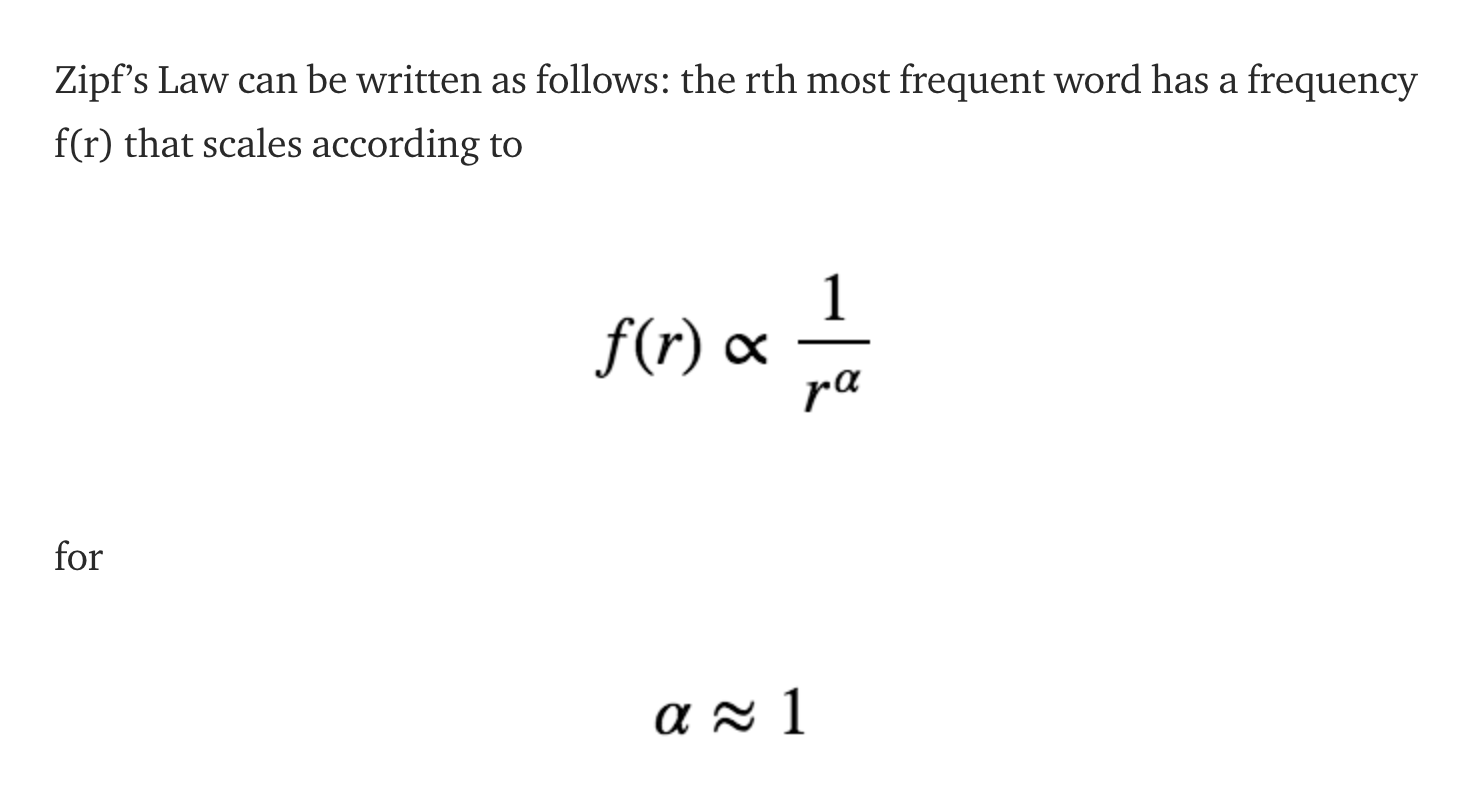

In [39]:
tf =frequency
sorted_freq = sorted([(j,i) for i,j in tf.items()], reverse=True)

In [40]:
sorted_df_zipf = pd.DataFrame(sorted_freq, columns=['freq', 'word'])

In [41]:
sorted_df_zipf

,freq,word
0,9042,это
1,3803,всё
2,3367,который
3,3095,свой
4,2637,весь
...,...,...
41989,1,ааам
41990,1,ааааахахахах
41991,1,ааааарррррррррррряяять
41992,1,аааааааааааааааааааааааа


In [43]:
values = [k for k,l in sorted_freq]
y_pos = np.arange(len(sorted_freq))
s = 1
expected_zipf = [sorted_df_zipf.sort_values(by='freq', ascending=False)['freq'][0]/(i+1)**s for i in tqdm(y_pos)]

  0%|          | 0/41994 [00:00<?, ?it/s]

In [44]:
sorted_df_zipf['zipf'] = expected_zipf

In [ ]:
sorted_df_zipf

,freq,word,zipf
0,9042,это,9042.000000
1,3803,всё,4521.000000
2,3367,который,3014.000000
3,3095,свой,2260.500000
4,2637,весь,1808.400000
...,...,...,...
41989,1,ааам,0.215337
41990,1,ааааахахахах,0.215332
41991,1,ааааарррррррррррряяять,0.215327
41992,1,аааааааааааааааааааааааа,0.215322


In [ ]:
sorted_df_zipf.to_csv('zipf_dict.csv')

Text(0.5, 1.0, 'Top 50 tokens')

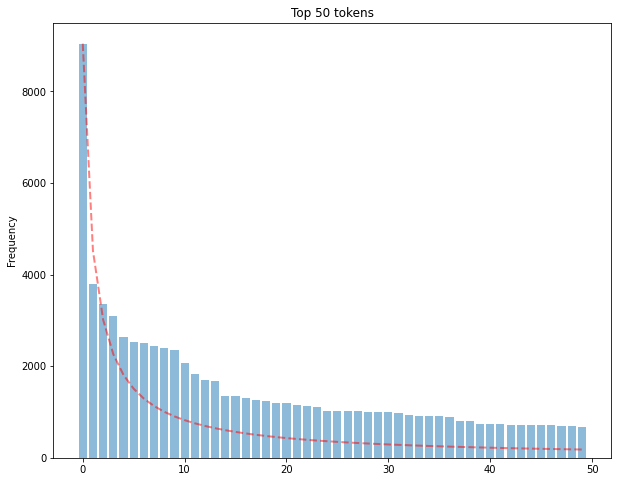

In [48]:
y_pos = np.arange(50)
plt.figure(figsize=(10,8))
s = 1

plt.bar(y_pos, sorted_df_zipf.sort_values(by='freq', ascending=False)['freq'][:50], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf[:50], color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 50 tokens')

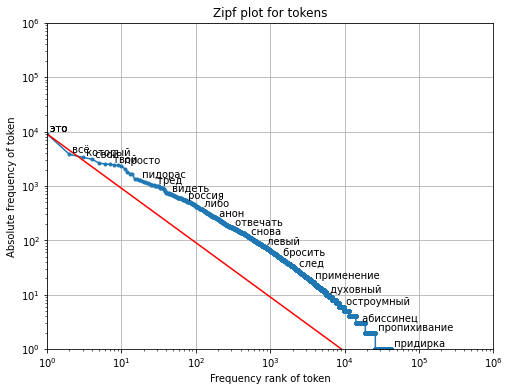

In [ ]:
from pylab import *
counts = sorted_df_zipf.freq
tokens = sorted_df_zipf.word
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

### Ipm + zipf

In [49]:
zipf_dict = {}
for ind, row in sorted_df_zipf.iterrows():
  zipf_dict[row.word] = row.zipf

In [50]:
updated_lst = []

for ind, row in tqdm(sdf.iterrows()):
  loc_lst = []
  counter = 0
  row_words = row['Выделенные слова']
  tokens = tokenize(row_words)
  words = [_.text for _ in tokens if _.text != ',']
  for word in words:
    try:
      loc_lst.append(zipf_dict[norm(str(word))])
    except KeyError:
      loc_lst.append(sorted_df_zipf.sort_values(by='freq', ascending=False)['freq'][0]/(len(expected_zipf)+1 + counter)**s)
      counter += 1
  updated_lst.append(loc_lst)
  


0it [00:00, ?it/s]

In [51]:
sdf['zipf'] = updated_lst

In [ ]:
sdf

,Реплика 1 toxicity,Реплика 2 toxicity,Результат 1,Результат 2,Значение 1,Значение 2,Реплика 1 original,Реплика 2 original,Реплика 2 lemma,Выделенные слова,target_group,clean_replics_2,clean_replics_1,count_replics_1,count_replics_2,ipm,zipf
93,м когда мужики спокойно за прыгают. пиздомраз...,слышишь блядь заткни свой ебальник сука,True,True,0.990932,0.997031,150 м Когда мужики спокойно за 250 прыгают. П...,Слышишь блядь заткни свой ебальник сука,"['слышать', 'блядь', 'заткнуть', 'свой', 'ебал...","блядь, сука",women,"[слышать, блядь, заткнуть, свой, ебальник, сука]","[м, когда, мужик, спокойно, за, прыгать, пиздо...",17,6,"[3642.207530790995, 1712.2843529757424]","[1507.0, 430.57142857142856]"
869,журналюхи развели проф. бабуина на разговор о ...,я высказал предположение что ... но естествен...,True,True,0.983081,0.994750,журналюхи развели проф. Бабуина на разговор о ...,я высказал предположение что ... но естествен...,"['я', 'высказать', 'предположение', 'что', '.....","блядь, сука",women,"[я, высказать, предположение, что, но, естеств...","[журналюха, развести, проф, бабуин, на, разгов...",35,60,"[3642.207530790995, 1712.2843529757424]","[1507.0, 430.57142857142856]"
136,возможности карьеры прям про двачера для двач...,блядь сука пиздец вот повезло ебаный рот за чт...,False,True,0.079426,0.996924,Возможности карьеры 1991 Прям про двачера для...,БЛЯДЬ СУКА ПИЗДЕЦ ВОТ ПОВЕЗЛО ЕБАНЫЙ РОТ ЗА ЧТ...,"['блядь', 'сук', 'пиздец', 'вот', 'повезти', '...","блядь, сука",women,"[блядь, сука, пиздец, вот, повезти, ёбаный, ро...","[возможность, карьера, прям, про, двачер, для,...",7,69,"[3642.207530790995, 1712.2843529757424]","[1507.0, 430.57142857142856]"
2103,"в византии не было университетов, мань",в византии были государственные школы. до юсти...,False,True,0.001312,0.975552,"В Византии не было университетов, мань",В Византии были государственные школы. До Юсти...,"['в', 'византия', 'быть', 'государственный', '...","блядь, сука",women,"[в, византия, быть, государственный, школа, до...","[в, византия, не, быть, университет, маня]",6,64,"[3642.207530790995, 1712.2843529757424]","[1507.0, 430.57142857142856]"
641,я думал на земле нет таких людей которые смогл...,лол мы чуть - не проебали сука я убил куры уби...,False,True,0.001034,0.995478,я думал на земле нет таких людей которые смогл...,ЛОЛ мы чуть 4-5 не проебали СУКА Я УБИЛ КУРЫ У...,"['лола', 'мы', 'чуть', '-', 'не', 'проебали', ...","блядь, сука",women,"[лола, мы, чуть, не, проебали, сука, я, убить,...","[я, думать, на, земля, нет, такой, человек, ко...",18,33,"[3642.207530790995, 1712.2843529757424]","[1507.0, 430.57142857142856]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,покажи мне как ты меня любишь,вы игнорируете высер малолетнего анимедолбоеба...,False,True,0.001094,0.991665,Покажи мне как ты меня любишь,Вы игнорируете высер малолетнего анимедолбоеба...,"['вы', 'игнорировать', 'высера', 'малолетний',...",анимедолбоеб,man,"[вы, игнорировать, высера, малолетний, анимедо...","[показать, я, как, ты, я, любить]",6,6,[1e-05],[0.21531134658887963]
12727,дауны с сайгами и вепрями в . под вопросом: м...,ты специально игноришь слово боевого ? говорю...,False,True,0.085136,0.987481,Дауны с сайгами и вепрями в .308 под вопросом...,Ты специально игноришь слово «боевого»? Говор...,"['ты', 'специально', 'игнорить', 'слово', 'бое...",аркоеб,other,"[ты, специально, игнорить, слово, боевой, гово...","[даун, с, сайга, и, вепрь, в, под, вопрос, маг...",40,22,[1e-05],[0.21531134658887963]
13132,интернет сообщество в основном состоит из бэк...,"да кончено. минькоебы творческие люди, финанс...",False,True,0.417419,0.957528,Интернет сообщество в основном состоит из бэк...,"Да кончено. Минькоебы творческие люди, финанс...","['да', 'кончено.', 'минькоеб', 'творческий', '...",минькоеб,other,"[да, конченый, минькоеб, творческий, человек, ...","[интернет, сообщество, в, основное, состоять, ...",28,22,[1e-05],[0.21531134658887963]
9700,там были маты при дубляже там вроде

In [52]:
dict_params = {}

for ind, row in tqdm(sdf.iterrows()):
  row_words = row['Выделенные слова']
  tokens = tokenize(row_words)
  words = [_.text for _ in tokens if _.text != ',']
  for word in words:
    try:
      dict_params[word] = {'zipf': zipf_dict[norm(str(word))], 'ipm': ipm_dict[norm(word)]}
    except KeyError:
      dict_params[word] = {'zipf':  sorted_df_zipf.sort_values(by='freq', ascending=False)['freq'][0]/(len(expected_zipf)+1 + counter)**s, 'ipm': 10**(-5)}
  

0it [00:00, ?it/s]

In [53]:
srt_df_new = pd.DataFrame(dict_params)

In [54]:
srt_df_new = srt_df_new.transpose()

In [55]:
srt_df_new = srt_df_new.sort_values(by='zipf', ascending=False)

In [ ]:
srt_df_new

,zipf,ipm
блядь,1507.000000,3642.207531
хохол,645.857143,2415.646945
хуй,565.125000,1945.777672
хуи,565.125000,1945.777672
пидорас,531.882353,1873.711833
...,...,...
фашистоеб,0.215306,0.000010
теслоеб,0.215306,0.000010
музлоеб,0.215306,0.000010
ютубдолбоеб,0.215306,0.000010


In [ ]:
srt_df_new.to_csv('zipf_ipm.csv', sep='\t')

In [66]:
x = srt_df_new.head(50).index
ipm_list = srt_df_new.head(50).ipm
zipf_list = srt_df_new.head(50).zipf

In [76]:
plt.rcParams.update({'font.size': 22})

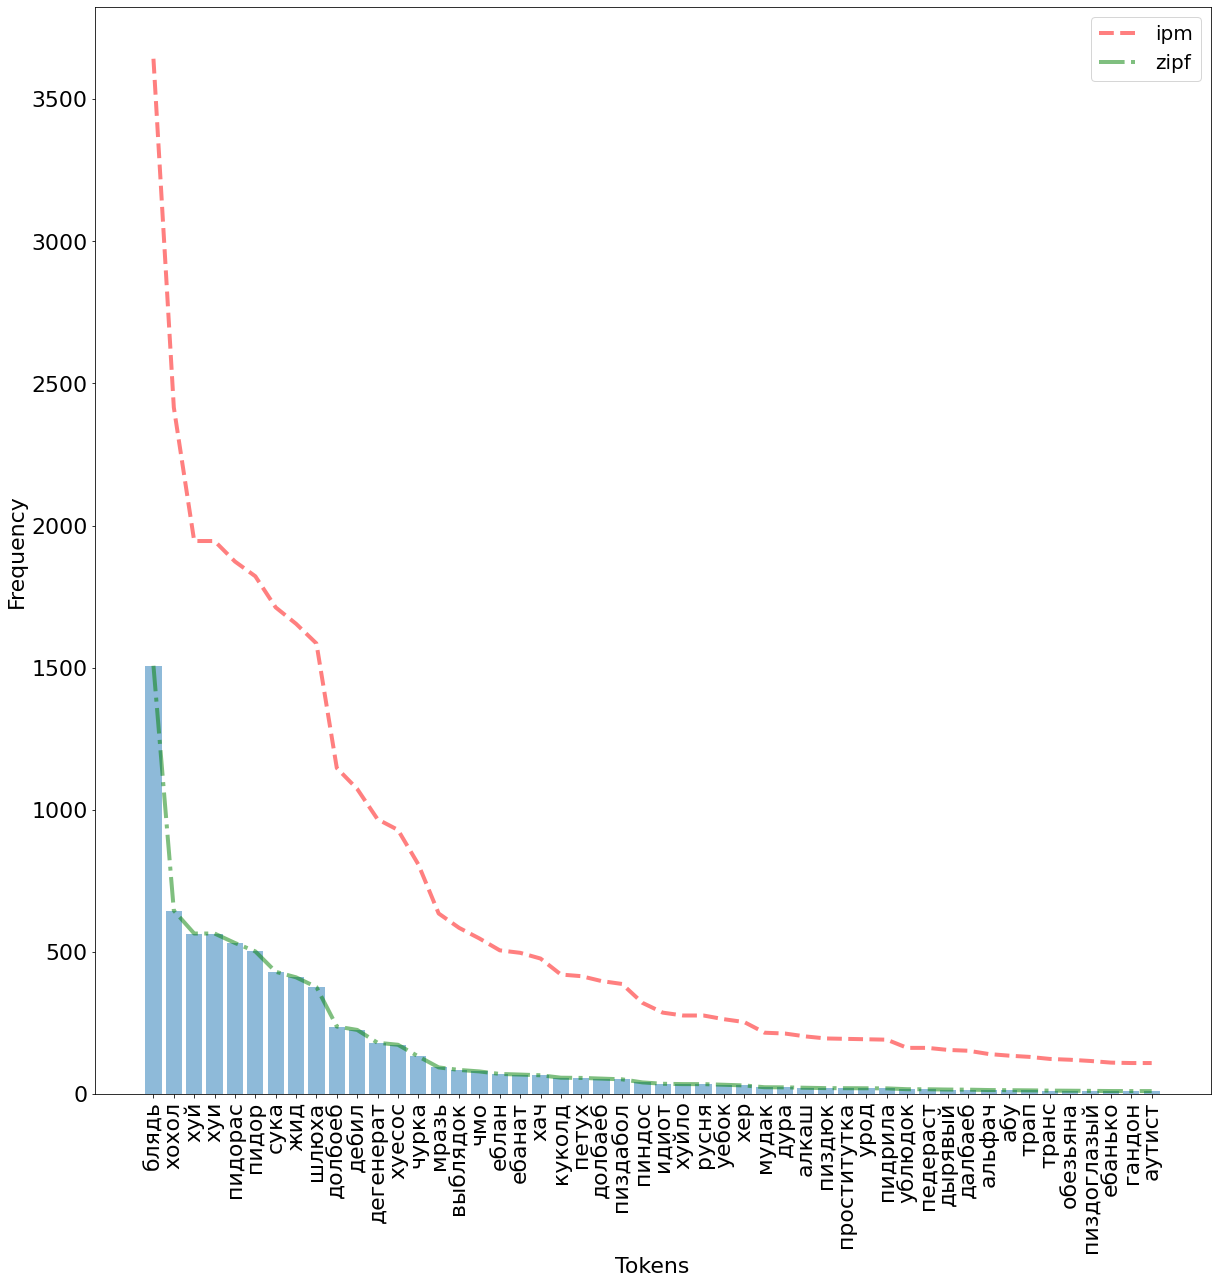

In [78]:
y_pos = np.arange(len(x))


plt.figure(figsize=(20,20))
plt.bar(y_pos, zipf_list, align='center', alpha=0.5)
plt.plot(y_pos, ipm_list, color='r', linestyle='--',linewidth=4,alpha=0.5)
plt.plot(y_pos, zipf_list, color='g', linestyle='-.',linewidth=4,alpha=0.5)
plt.legend(["ipm", "zipf"], loc ="upper right", prop={'size': 20})
plt.xticks(y_pos, zipf_list.index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Tokens')
# plt.title('Tokens in corpus')
plt.savefig('foo.png', bbox_inches='tight')

In [75]:
plt.savefig('ipm_zipf_50.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
subset = sdf[['Реплика 1 toxicity',	'Реплика 2 toxicity',	'Результат 1',
              'Результат 2', 'Значение 1',	'Значение 2',	'Реплика 1 original',
              'Реплика 2 original',	'Реплика 2 lemma',	'Выделенные слова',	'target_group', 'ipm', 'zipf']]

In [ ]:
subset.to_csv('corpus_ipm_zipf.csv', sep='\t')